In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
sdf=df.drop(['Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked','PassengerId'],axis='columns')

In [54]:
sdf

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [57]:
sdf.Age=sdf.Age.fillna(sdf.Age.mean())

In [59]:
sdf

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [60]:
target=df['Survived']

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
sdf['sex_n']=le.fit_transform(sdf['Sex'])

In [64]:
sdf

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.000000,7.2500,1
1,1,female,38.000000,71.2833,0
2,3,female,26.000000,7.9250,0
3,1,female,35.000000,53.1000,0
4,3,male,35.000000,8.0500,1
...,...,...,...,...,...
886,2,male,27.000000,13.0000,1
887,1,female,19.000000,30.0000,0
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [65]:
data1=sdf.drop(['Sex'],axis='columns')

In [66]:
data1

,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [67]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test=train_test_split(data1,target,test_size=0.3)

In [70]:
model=tree.DecisionTreeClassifier()

In [71]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
c=model.predict(X_test)

In [76]:
model.predict([[3,22,7.25,1]])

array([0], dtype=int64)

In [77]:
import matplotlib.pyplot as plt

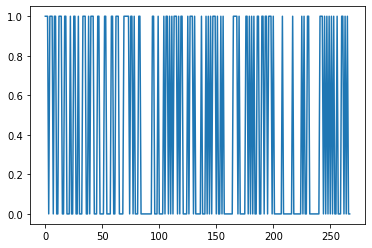

In [81]:
plt.plot(c)